# análisis frecuencial

## bibliotecas

In [2]:
import numpy             as np
import numpy.fft         as fft
import cv2               as cv
import skimage           as si
import matplotlib.pyplot as plt
import numpy.random      as rnd
import scipy.signal      as signal

from matplotlib.pyplot import imshow, subplot, title, plot

%matplotlib inline

## funciones útiles

In [3]:
def fig(w,h):
    plt.figure(figsize=(w,h))

def readrgb(file):
    return cv.cvtColor( cv.imread("../images/"+file), cv.COLOR_BGR2RGB) 

def rgb2gray(x):
    return cv.cvtColor(x,cv.COLOR_RGB2GRAY)

def gray2float(x):
    return x.astype(float) / 255

# para ver imágenes monocromas autoescalando el rango
def imshowg(x):
    imshow(x, 'gray')

# para ver imágenes monocromas de float con rango fijo
def imshowf(x):
    imshow(x, 'gray', vmin = 0, vmax=1)
    
# para ver imágenes con signo
def imshows(x,r=1):
    imshow(x, 'gray', vmin = -r, vmax=r)

# ojo: filter2D no hace flip de la máscara (realmente hace correlación)
# (da igual en máscaras simétricas)
def conv(k,x):
    return cv.filter2D(x,-1,k)

# esta versión es correcta
def cconv(k,x):
    return signal.convolve2d(x, k, boundary='symm', mode='same')

def ft(x):
    return fft.fft2(x)

def ift(x):
    return fft.ifft2(x)

def centrafft(psf):
    h = psf.copy()
    r,c = psf.shape
    h = h[list(range(r//2,r)) + list(range(r//2)) ,:]
    h = h[:, list(range(c//2,c)) + list(range(c//2))]
    return h

## experimentos de descomposición frecuencial

Cualquier señal se puede expresar como una combinación de ondas de diferentes frecuencias.

$$ f(x) = \sum A_\omega \cos(2\pi \omega x + \phi_\omega) $$

Cada frecuencia $\omega$ contribuye con una cierta amplitud $A_\omega$ y desplazamiento $\phi_\omega$. La Transformada de Fourier es un algoritmo que analiza la señal y obtiene estos dos ingredientes.

Por conveniencia matemática es mucho mejor usar ondas complejas

$$ f(x) = \sum _ \omega F_\omega  e ^ {2 \pi i \omega x} $$

donde los coeficientes codifican en un número complejo la amplitud y el desplazamiento de cada frecuencia.

$$ F_\omega = A e^{i \phi_\omega} $$



Como ejemplo, generamos una señal con componentes frecuenciales conocidas y vemos como la FFT las encuentra:

In [4]:
# componente frecuencial de amplitud a, frecuencia w y fase d
def C(a,w,d,x):
    return a*np.cos(2*np.pi*w*x+d)

def fun(x):
    return 1 + C(3,2,0.1,x) + C(4,5,-0.2,x) + C(2,15,0.3,x)

xx = np.linspace(0,1,1000)

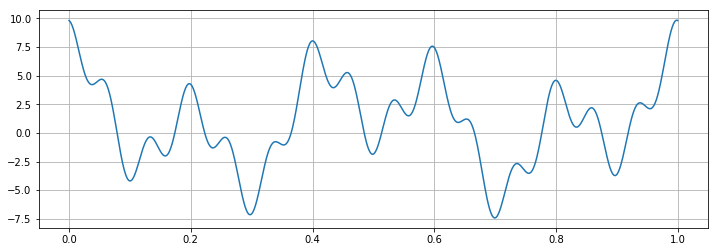

In [5]:
fig(12,4)
plot(xx,fun(xx));
plt.grid();

La hemos conseguido sumando las siguientes componentes:

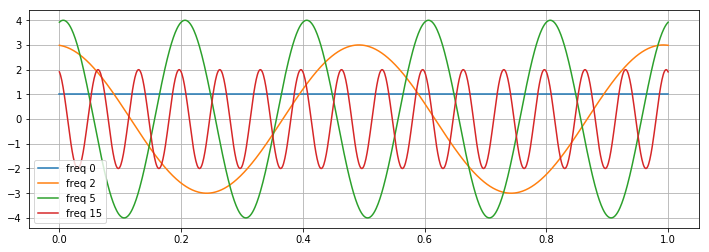

In [6]:
fig(12,4)
plot(xx,1+0*xx, label='freq 0')
plot(xx,C(3,2,0.1,xx), label='freq 2')
plot(xx,C(4,5,-0.2,xx), label='freq 5')
plot(xx,C(2,15,0.3,xx), label='freq 15');
plt.grid(); plt.legend();

En la práctica, solo observamos un muestreo de la señal:

[ 9.81595179  6.30286858  4.24035093  4.40848432 -0.32957162 -4.19336136
 -1.59759719 -0.62238073 -1.97947832  1.54265739  4.23997162  0.6004706
 -1.23016223 -0.48641156 -4.34128591 -7.0698233  -3.15806809 -0.76881047
 -0.70266617  4.16248461  8.03820054  5.33844453  4.14985238  5.19759762
  1.28957065 -1.84592679  1.33063173  2.70265116  1.53343255  5.02271813
  7.46851721  3.37463965  0.91531904  0.89557345 -3.80963236 -7.42190696
 -4.37176625 -2.767862   -3.36146333  1.01100384  4.59205528  1.81416876
  0.76888931  2.17238559 -1.18980513 -3.62367804  0.36620768  2.6121526
  2.32254585  6.6418604 ]


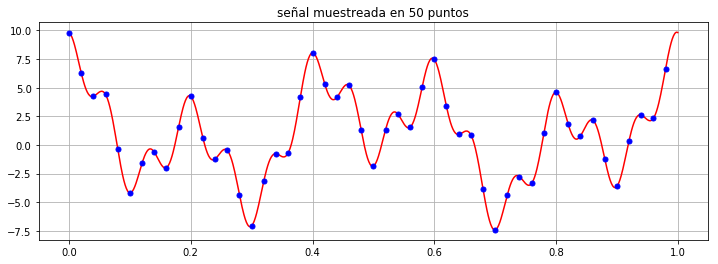

In [22]:
delta = 0.02
x =  np.linspace(0,1-delta,50)
f = fun(x)

print(f)

fig(12,4)
plot(xx,fun(xx),'r',x,f,'.b',markerSize=10); plt.grid()
title('señal muestreada en 50 puntos');

In [8]:
# dividimos por n para que la escala global de la FFT coincida con
F = fft.fft(f)/len(f)

# para visualizar mejor el array, quito los ceros numéricos
F[abs(F)<1E-10] = 0

F

array([ 1.00000000+0.j        ,  0.00000000+0.j        ,
        1.49250625+0.14975012j,  0.00000000+0.j        ,
        0.00000000+0.j        ,  1.96013316-0.39733866j,
        0.00000000+0.j        ,  0.00000000+0.j        ,
        0.00000000+0.j        ,  0.00000000+0.j        ,
        0.00000000+0.j        ,  0.00000000+0.j        ,
        0.00000000+0.j        ,  0.00000000+0.j        ,
        0.00000000+0.j        ,  0.95533649+0.29552021j,
        0.00000000+0.j        ,  0.00000000+0.j        ,
        0.00000000+0.j        ,  0.00000000+0.j        ,
        0.00000000+0.j        ,  0.00000000+0.j        ,
        0.00000000+0.j        ,  0.00000000+0.j        ,
        0.00000000+0.j        ,  0.00000000+0.j        ,
        0.00000000+0.j        ,  0.00000000+0.j        ,
        0.00000000+0.j        ,  0.00000000+0.j        ,
        0.00000000+0.j        ,  0.00000000+0.j        ,
        0.00000000+0.j        ,  0.00000000+0.j        ,
        0.00000000+0.j        ,

In [9]:
abs(F)

array([ 1. ,  0. ,  1.5,  0. ,  0. ,  2. ,  0. ,  0. ,  0. ,  0. ,  0. ,
        0. ,  0. ,  0. ,  0. ,  1. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,
        0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,
        0. ,  0. ,  1. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,
        0. ,  2. ,  0. ,  0. ,  1.5,  0. ])

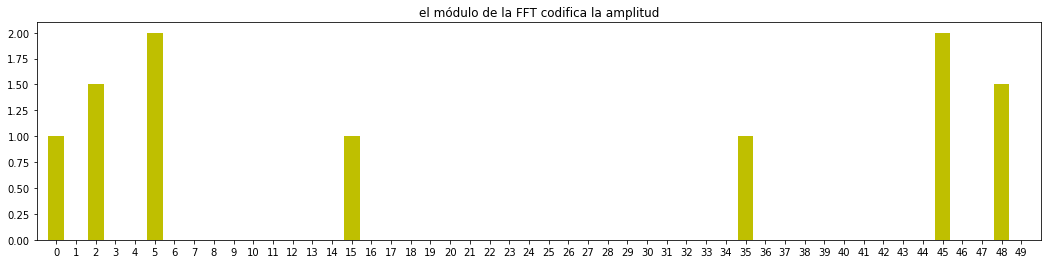

In [10]:
w = np.array(range(len(F)))
fig(18,4)
plt.bar(w,abs(F), color='y')
plt.xticks(w); plt.axis([-1,50,0,2.1]);
title('el módulo de la FFT codifica la amplitud');

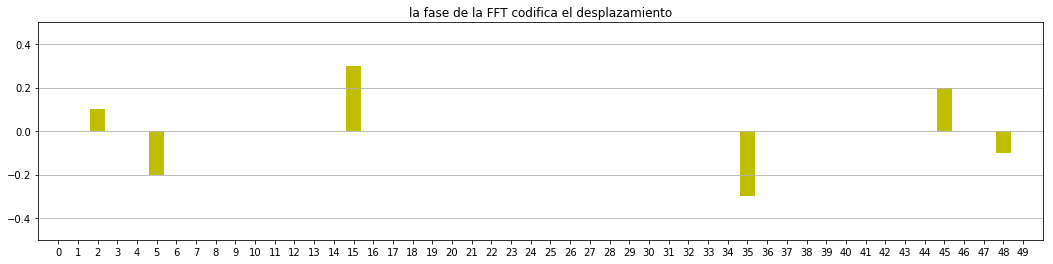

In [11]:
w = np.array(range(len(F)))
fig(18,4)
plt.bar(w,np.angle(F), color='y')
plt.xticks(w); plt.axis([-1,50,-0.5,0.5]);
#plt.grid()
title('la fase de la FFT codifica el desplazamiento');
plt.grid(axis='y')

Vemos que la magnitud de la transformada de Fourier, que es una señal compleja, contiene la amplitud de cada onda $A_\omega$, y la "fase" es el desplazamiento $\phi_\omega$. Observa que cada frecuencia $\omega$ aparece en la transformada en dos posiciones, correspondientes a $\omega$ y $-\omega$ (que en realidad son la misma onda), y que las frecuencias negativas aparecen al final del vector.

La FFT es periódica y por tanto las frecuencias superiores a $N/2$ equivalen a frecuencias negativas. Por tanto, lo normal es mostrar "rotada" la fft para poner las frecuencias bajas en el centro del vector.

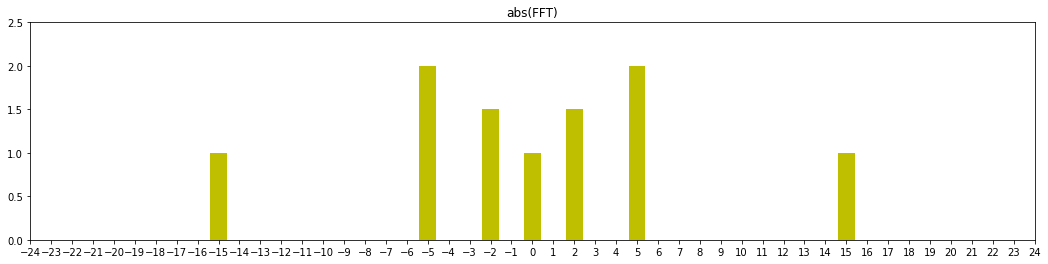

In [12]:
n = len(F)
n2 = (n+1) // 2
w = np.array(range(len(F)))
ws = np.roll(w,n2)
Fs = np.roll(F,n2)
fig(18,4)
plt.bar(w-25,abs(Fs), color='y')
plt.xticks(w-25); 
plt.axis([-24,24,0,2.5]);
title('abs(FFT)');

Cuando la señal es real la FFT es simétrica conjugada, como ocurre en el ejemplo anterior.

Si se toman $n$ muestras sólo se puede analizar hasta la frecuencia $n\over2$.

### armónicos

Consideremos ahora una señal periódica pero con forma de onda muy distinta de la sinusoidal.

In [13]:
x = np.arange(1000)
f = np.zeros_like(x)
f[x % 50 < 10] = 1

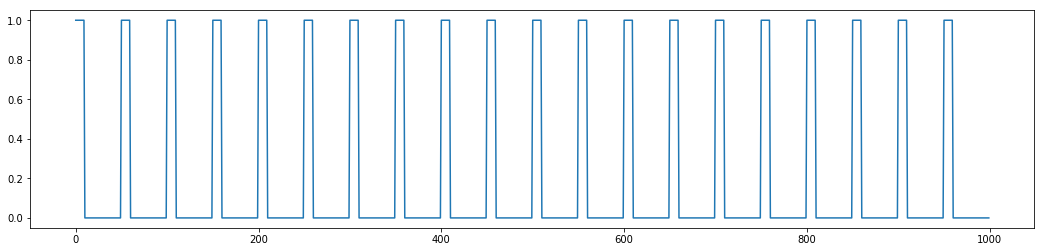

In [15]:
fig(18,4)
plt.plot(f);

In [18]:
F = fft.fft(f)/len(f)

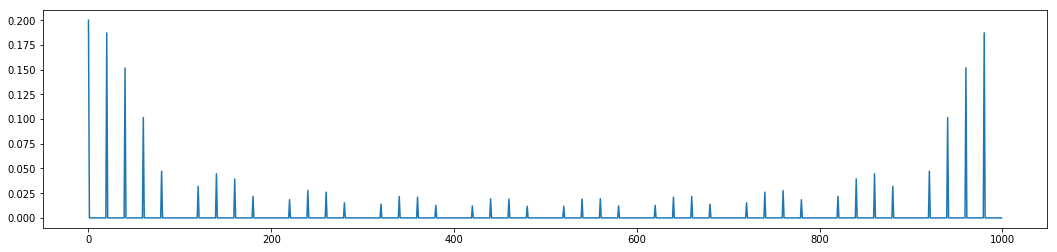

In [20]:
fig(18,4)
plt.plot(abs(F));

La frecuencia $20=1000/50$ se detecta perfectamente pero aparencen armónicos, múltiplos de la frecuencia fundamental.

### transformada inversa

Podemos sintetizar ondas creando un vector con las amplitudes de cada frecuencia y aplicando la transformada inversa:

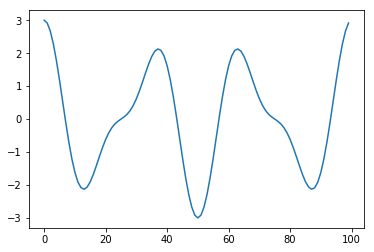

In [15]:
F = np.zeros(100,dtype=complex)
F[3] = 2
F[5] = 1
f = fft.ifft(F)*len(F)
plot(np.real(f));

### filtrado frecuencial

Generamos una señal de test:

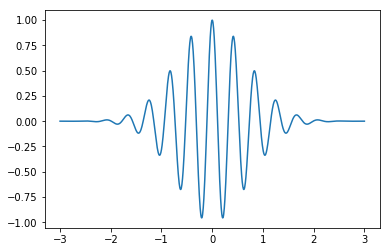

In [16]:
x = np.linspace(-3,3,1000)
s = np.exp(-x**2)*np.cos(15*x)
plot(x,s);

La contaminamos con ruido gaussiano:

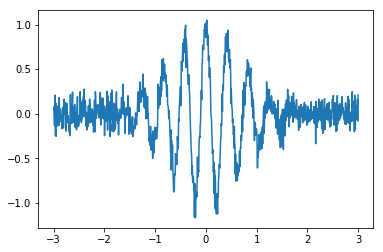

In [17]:
sr = s + 0.1*rnd.randn(len(s))
plot(x,sr);

Nos gustaría "limpiar" esta señal ruidosa para recuperar una versión lo más parecida posible a la original. Esto se podría hacer de diferentes formas, pero aquí vamos a intentar hacerlo modificando su espectro de frecuencias. El ruido gaussiano es "blanco", tiene todas las frecuencias. Si sabemos cuál es el ancho de banda de la señal original podemos eliminar las demás frecuencias.

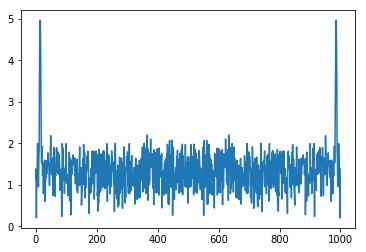

In [18]:
fsr = fft.fft(sr)
plt.plot(np.log(1+np.abs(fsr)));

Hagamos "zoom":

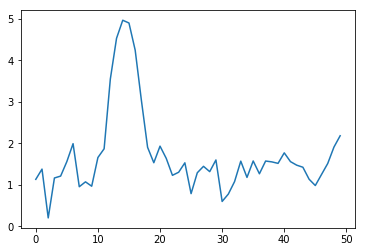

In [19]:
fsr = fft.fft(sr)
plt.plot(np.log(1+np.abs(fsr))[0:50]);

Parece que la señal llega hasta la frecuencia 20 más o menos. Anulamos todas las mayores y reconstruimos:

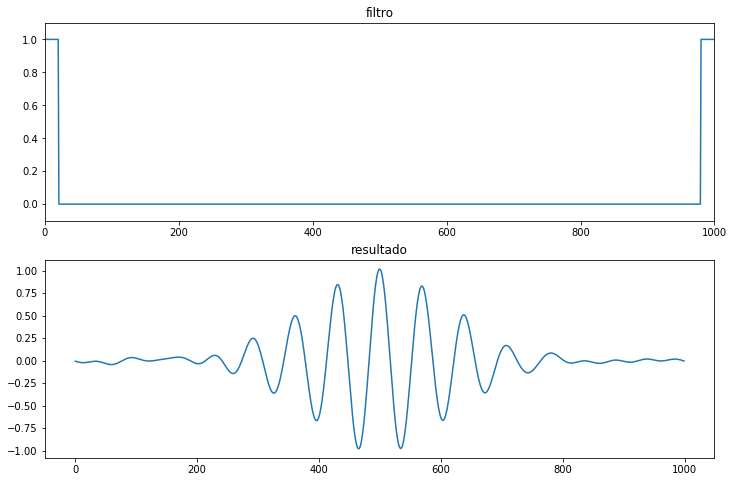

In [23]:
fig(12,8)
fil = np.ones(len(fsr))
c = 21
fil[c:-(c-1)] = 0
subplot(2,1,1)
plt.plot(fil); plt.axis([0,1000,-0.1,1.1]); title('filtro')
subplot(2,1,2)
plt.plot(np.real(fft.ifft(fsr*fil))); title('resultado');

Si conocemos el espectro de la señal original podríamos filtrar con mayor precisión.

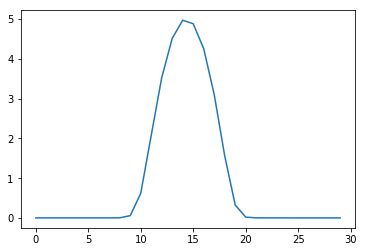

In [24]:
plt.plot(np.log(1+np.abs(fft.fft(s)[0:30])));

Vemos que solo tiene componentes apreciables en las frecuencias desde 9 hasta 19. El resto se puede eliminar.

En la práctica no se debe filtrar tan bruscamente, es mejor atenuar frecuencias de forma gradual.

### señales 2D

Cuando trabajamos con señales bidimensionales (imágenes) las componentes frecuenciales son ondas planas en diferentes direcciones, frecuencias y desplazamientos:

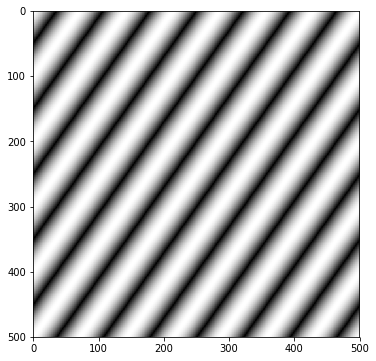

In [27]:
F = np.zeros([500,500])
F[3,4] = 1; F[-2,-3] = 1
#F[4,6] = 1; F[-3,-5] = 1
#F[1,2] = 1; F[-1,-2] = 1
f = ift(F)
fig(6,6)
plt.imshow(np.abs(f),'gray');

Si la imagen tiene un patrón repetido uniforme su orientación y frecuencia se puede descubrir en la FFT.

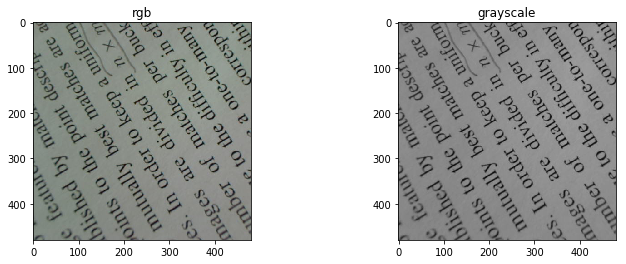

In [44]:
img = readrgb('texto/borroso0.png')
n = min(img.shape[:2])
img = img[:n,:n]
#img = readrgb('d2.jpg')[0:800,0:800]


fig(12,4)
subplot(1,2,1); imshow(img); title('rgb')
g = rgb2gray(img)
f = gray2float(g)
subplot(1,2,2); imshowf(f); title('grayscale');

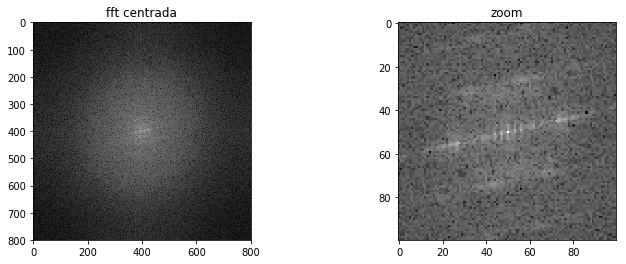

In [41]:
ff = np.log(1+abs(ft(f)))
#ff[0,0] = 0
r,c = ff.shape
r2 = r // 2
c2 = c // 2

fig(12,4)
subplot(1,2,1); imshowg(centrafft(ff)); title('fft centrada')
subplot(1,2,2); imshowg(centrafft(ff)[r2-50:r2+50,c2-50:c2+50]); title('zoom');

Los picos más cercanos al origen nos dan la dirección y frecuencia de la oscilación fundamental.

## misc

- clasificación de trazos

- cambiar fase vs cambiar amplitud

- [imágenes híbridas](http://jeremykun.com/2014/09/29/hybrid-images/)

- [vídeo de reconstrucción](https://www.youtube.com/watch?v=D9ziTuJ3OCw)